<h1>Data analysis for dataset Titanic</h1>
<h2>Final project Intro to Programming Nanodegree - Data Analysis Path</h2>

 The question I will answer in this analysis:<br> 
 What factors made people more likely to survive?<br>
 
 I will analyse these factors:
<ul> <b>
<li> Age </li>
<li> Ticket fare </li>
<li> Gender </li> </b>
</ul> 


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

#loading data into dataframe

filename = 'titanic_data.csv'
titanic_df = pd.read_csv(filename)

Populating the interactive namespace from numpy and matplotlib


<h3>Get some statistics about the data</h3>

In [37]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h3>Drop columns I don't need in my analysis</h3>

I delete column 'Name' since each passenger is unique<br>
I also delete 'Ticket', 'Cabin' and 'Embarked' since they are not relevant to my analysis

In [ ]:
titanic_df2 = titanic_df.drop(titanic_df.columns[[3,8,10,11]], axis=1)

<b>Check the first rows</b>

In [73]:
titanic_df2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


<h3>Exploring the statistics of survival by age</h3>

In [71]:
survival_by_age = titanic_df2.groupby('Survived')['Age']

survival_by_age.describe()


Survived       
0         count    424.000000
          mean      30.626179
          std       14.172110
          min        1.000000
          25%             NaN
          50%             NaN
          75%             NaN
          max       74.000000
1         count    290.000000
          mean      28.343690
          std       14.950952
          min        0.420000
          25%             NaN
          50%             NaN
          75%             NaN
          max       80.000000
Name: Age, dtype: float64

<b>It seems that the age didn't play a big role in the survival rate, the mean of each group is really close.</b>

In [84]:
def get_survival_groups_data(data, column):
    'creating a function that gets the data of the 2 groups survived and not_survived'
    
    survived = data[data['Survived'] == 1][column].dropna() #drop the NaNs
    not_survived = data[data['Survived'] == 0][column].dropna() #drop the NaNs
    return not_survived, survived


<h3>Creating 2 histograms showing the survival age for both groups</h3>

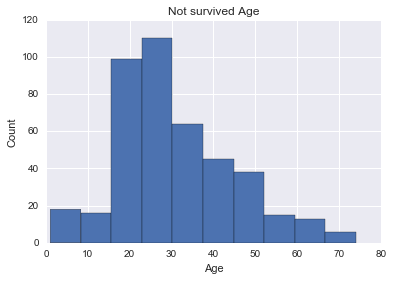

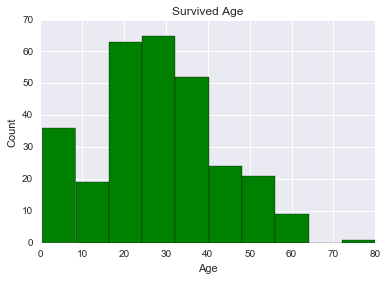

In [150]:
age_not_survived, age_survived = get_survival_groups_data(titanic_df2, 'Age')

plt.hist(age_not_survived.values)

plt.title('Not survived Age')
plt.xlabel('Age')
plt.ylabel('Count')
show()


plt.hist(age_survived.values, facecolor='g')

plt.title('Survived Age')
plt.xlabel('Age')
plt.ylabel('Count')
show()


<b>It seems that for both groups the people that had the most chances to survive were around their 30s,
considering that the mean for both groups is survived = 28.343690 and not_survived= 30.626179
this is not surprising.</b>

<h3>Exploring the statistics of survival by fare</h3>

In [148]:
survival_by_fare = titanic_df2.groupby('Survived')['Fare']

survival_by_fare.describe()

Survived       
0         count    549.000000
          mean      22.117887
          std       31.388207
          min        0.000000
          25%        7.854200
          50%       10.500000
          75%       26.000000
          max      263.000000
1         count    342.000000
          mean      48.395408
          std       66.596998
          min        0.000000
          25%       12.475000
          50%       26.000000
          75%       57.000000
          max      512.329200
Name: Fare, dtype: float64

<b>This is actually quite interesting. The mean for people that didn't survive is 22.117887,
the mean for the ones that survived is 48.395408 which is more than double.<br>

Let's show these data in 2 different histograms </b>

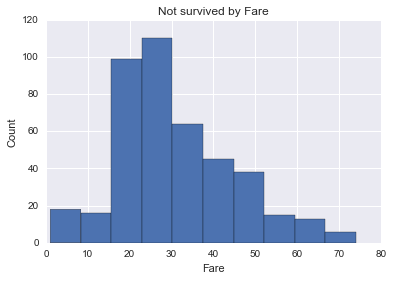

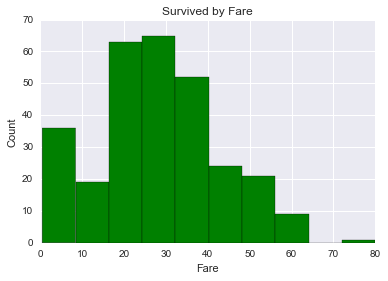

In [149]:
fare_not_survived, fare_survived = get_survival_groups_data(titanic_df2, 'Fare')

plt.hist(age_not_survived.values)
plt.title('Not survived by Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
show()

plt.hist(age_survived.values, facecolor='g')
plt.title('Survived by Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
show()

<h3>Exploring the statistics of survival by gender</h3>

In [174]:
survival_by_gender = titanic_df2.groupby(['Survived', 'Sex'])

survival_by_gender.describe()

Age        Fare       Parch  PassengerId  \
Survived Sex                                                             
0        female count   64.000000   81.000000   81.000000    81.000000   
                mean    25.046875   23.024385    1.037037   434.851852   
                std     13.618591   24.821287    1.391442   263.522063   
                min      2.000000    6.750000    0.000000    15.000000   
                25%           NaN    8.850000    0.000000   206.000000   
                50%           NaN   15.245800    0.000000   420.000000   
                75%           NaN   27.900000    2.000000   643.000000   
                max     57.000000  151.550000    6.000000   889.000000   
         male   count  360.000000  468.000000  468.000000   468.000000   
                mean    31.618056   21.960993    0.207265   449.121795   
                std     14.056019   32.409799    0.601382   260.365260   
                min      1.000000    0.000000    0.000000     1.000000   
                25%           NaN    7.795800    0.000000   212.500000   
                50%           NaN    9.416650    0.000000   461.000000   
                75%           NaN   26.000000    0.000000   678.500000   
                max     74.000000  263.000000    5.000000   891.000000   
1        female count  197.000000  233.000000  233.000000   233.000000   
                mean    28.847716   51.938573    0.515021   429.699571   
                std     14.175073   64.102256    0.820527   255.048296   
                min      0.750000    7.225000    0.000000     2.000000   
                25%           NaN   13.000000    0.000000   238.000000   
                50%           NaN   26.000000    0.000000   400.000000   
                75%           NaN   76.291700    1.000000   636.000000   
                max     63.000000  512.329200    5.000000   888.000000   
         male   count   93.000000  109.000000  109.000000   109.000000   
                mean    27.276022   40.821484    0.357798   475.724771   
                std     16.504803   71.355967    0.645826   244.717482   
                min      0.420000    0.000000    0.000000    18.000000   
                25%           NaN    9.500000    0.000000   272.000000   
                50%           NaN   26.287500    0.000000   508.000000   
                75%           NaN   39.000000    1.000000   680.000000   
                max     80.000000  512.329200    2.000000   890.000000   

                           Pclass       SibSp  
Survived Sex                                   
0        female count   81.000000   81.000000  
                mean     2.851852    1.209877  
                std      0.450309    1.814635  
                min      1.000000    0.000000  
                25%      3.000000    0.000000  
                50%      3.000000    1.000000  
                75%      3.000000    1.000000  
                max      3.000000    8.000000  
         male   count  468.000000  468.000000  
                mean     2.476496    0.440171  
                std      0.761411    1.138507  
                min      1.000000    0.000000  
                25%      2.000000    0.000000  
                50%      3.000000    0.000000  
                75%      3.000000    0.000000  
                max      3.000000    8.000000  
1        female count  233.000000  233.000000  
                mean     1.918455    0.515021  
                std      0.834211    0.737533  
                min      1.000000    0.000000  
                25%      1.000000    0.000000  
                50%      2.000000    0.000000  
                75%      3.000000    1.000000  
                max      3.000000    4.000000  
         male   count  109.000000  109.000000  
                mean     2.018349    0.385321  
                std      0.922774    0.636952  
                min      1.000000    0.000000  
                25%      1.000000    0.000000  
                50%      

<b>It looks like that a lot more women survived than men.</b>

<b>For gender I will use pie charts due to the fact that they better represent the data in this case.</b>

I checked how to create pie charts on the website http://stackoverflow.com/

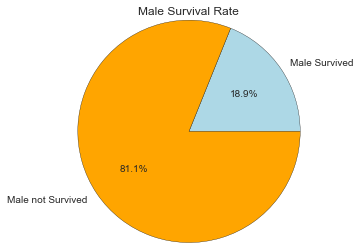

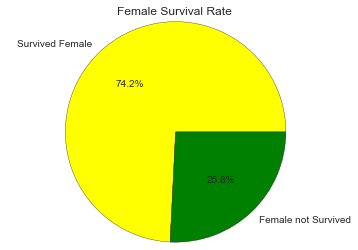

In [158]:
survival_by_gender = titanic_df2.groupby('Sex')['Survived'] # group by gender

labels = 'Male Survived', 'Male not Survived'
sizes = [gender_survival.mean()['male'], 1.0 - gender_survival.mean()['male']]
colors = ['lightblue', 'orange']


plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Male Survival Rate')
show()

labels = 'Survived Female', 'Female not Survived'
sizes = [gender_survival.mean()['female'], 1.0 - gender_survival.mean()['female']]
colors = ['yellow', 'green']


plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Female Survival Rate')
show()

<b>As we already saw before the rate of female survived (74.2%) is much higher than male survived (18.9%).</b>

<h2>Conclusions:</h2> 
<h3>From the factors I examined in this analysis seems that gender and ticket fare(which we can supposed
is related with the passenger class, although it hasn't been examined in this analysis) were the most correlated
to survival. The age is the least correlated to survival.</h3>

<h2>Limitations</h2>
<h3>According to <a haref='https://www.kaggle.com/c/titanic'>Kaggle</a>, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.
This analysis is taking into account only 891 passengers out of 2224, supposedly random passengers although Kaggle does not specify how the passengers were chosen. <br>
Likely, even if we considered all the passengers the trends of the survival factors would not change, we can't be 100% sure though since the data of 1333 passengers are missing.<br>
Finally, we don't have data about the crew and how many they were. It would have been interesting to know how many crew members survived and in what position they were working in. </h3>